In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
################################################################
################################################################
############## The Map used in this Research ###################
################################################################
################################################################

C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


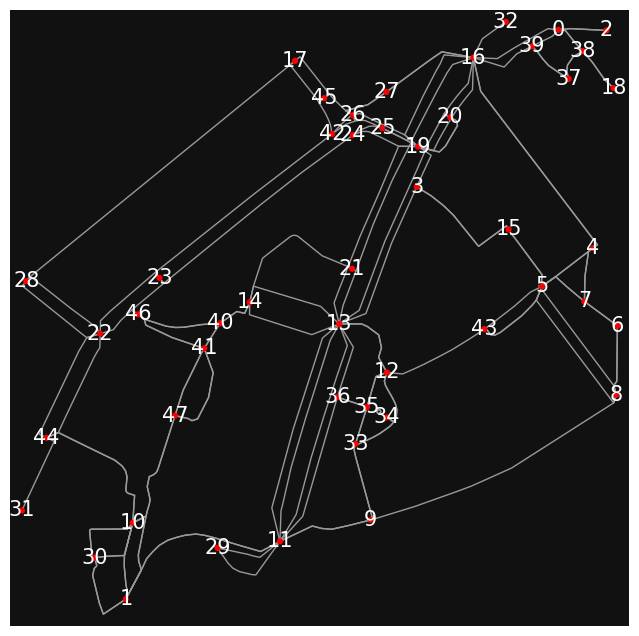

Number of nodes: 48
Number of edges: 135


In [3]:
#### Plotting our graph with node identification ####

# Load and simplify the graph
G = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands", dist=300)
G = ox.simplification.consolidate_intersections(
    G,
    tolerance=0.00013,  # Try 30-50 meters to cover roundabout radius
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Plot the graph and determine node size and color
fig, ax = ox.plot_graph(G, node_size=20, node_color='red', show=False, close=False)

# Extract node positions from the graph (using 'x' and 'y' attributes)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Draw node labels (node identifiers)
nx.draw_networkx_labels(G, pos=node_positions, ax=ax, font_size=15, font_color='White')

# Show the plot with labels
plt.show()

# Print node and edge counts
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

In [4]:

#################################################
#################################################
########## Analysis Normal Scenario #############
#################################################
#################################################


In [5]:
######## Average shortest path length ###########

G_u = G.to_undirected()
avg_path_length = nx.average_shortest_path_length(G_u)
print("Average shortest path length (largest connected component):", avg_path_length)


Average shortest path length (largest connected component): 3.9326241134751774


Shortest Path Length from 11 to 16: 4
Shortest Path Length:from 16 to 11: 4
Shortest Path Length:from 12 to 14: 2
Shortest Path Length:from 14 to 12: 2
Shortest Path Length:from 12 to 41: 4
Shortest Path Length:from 41 to 12: 4


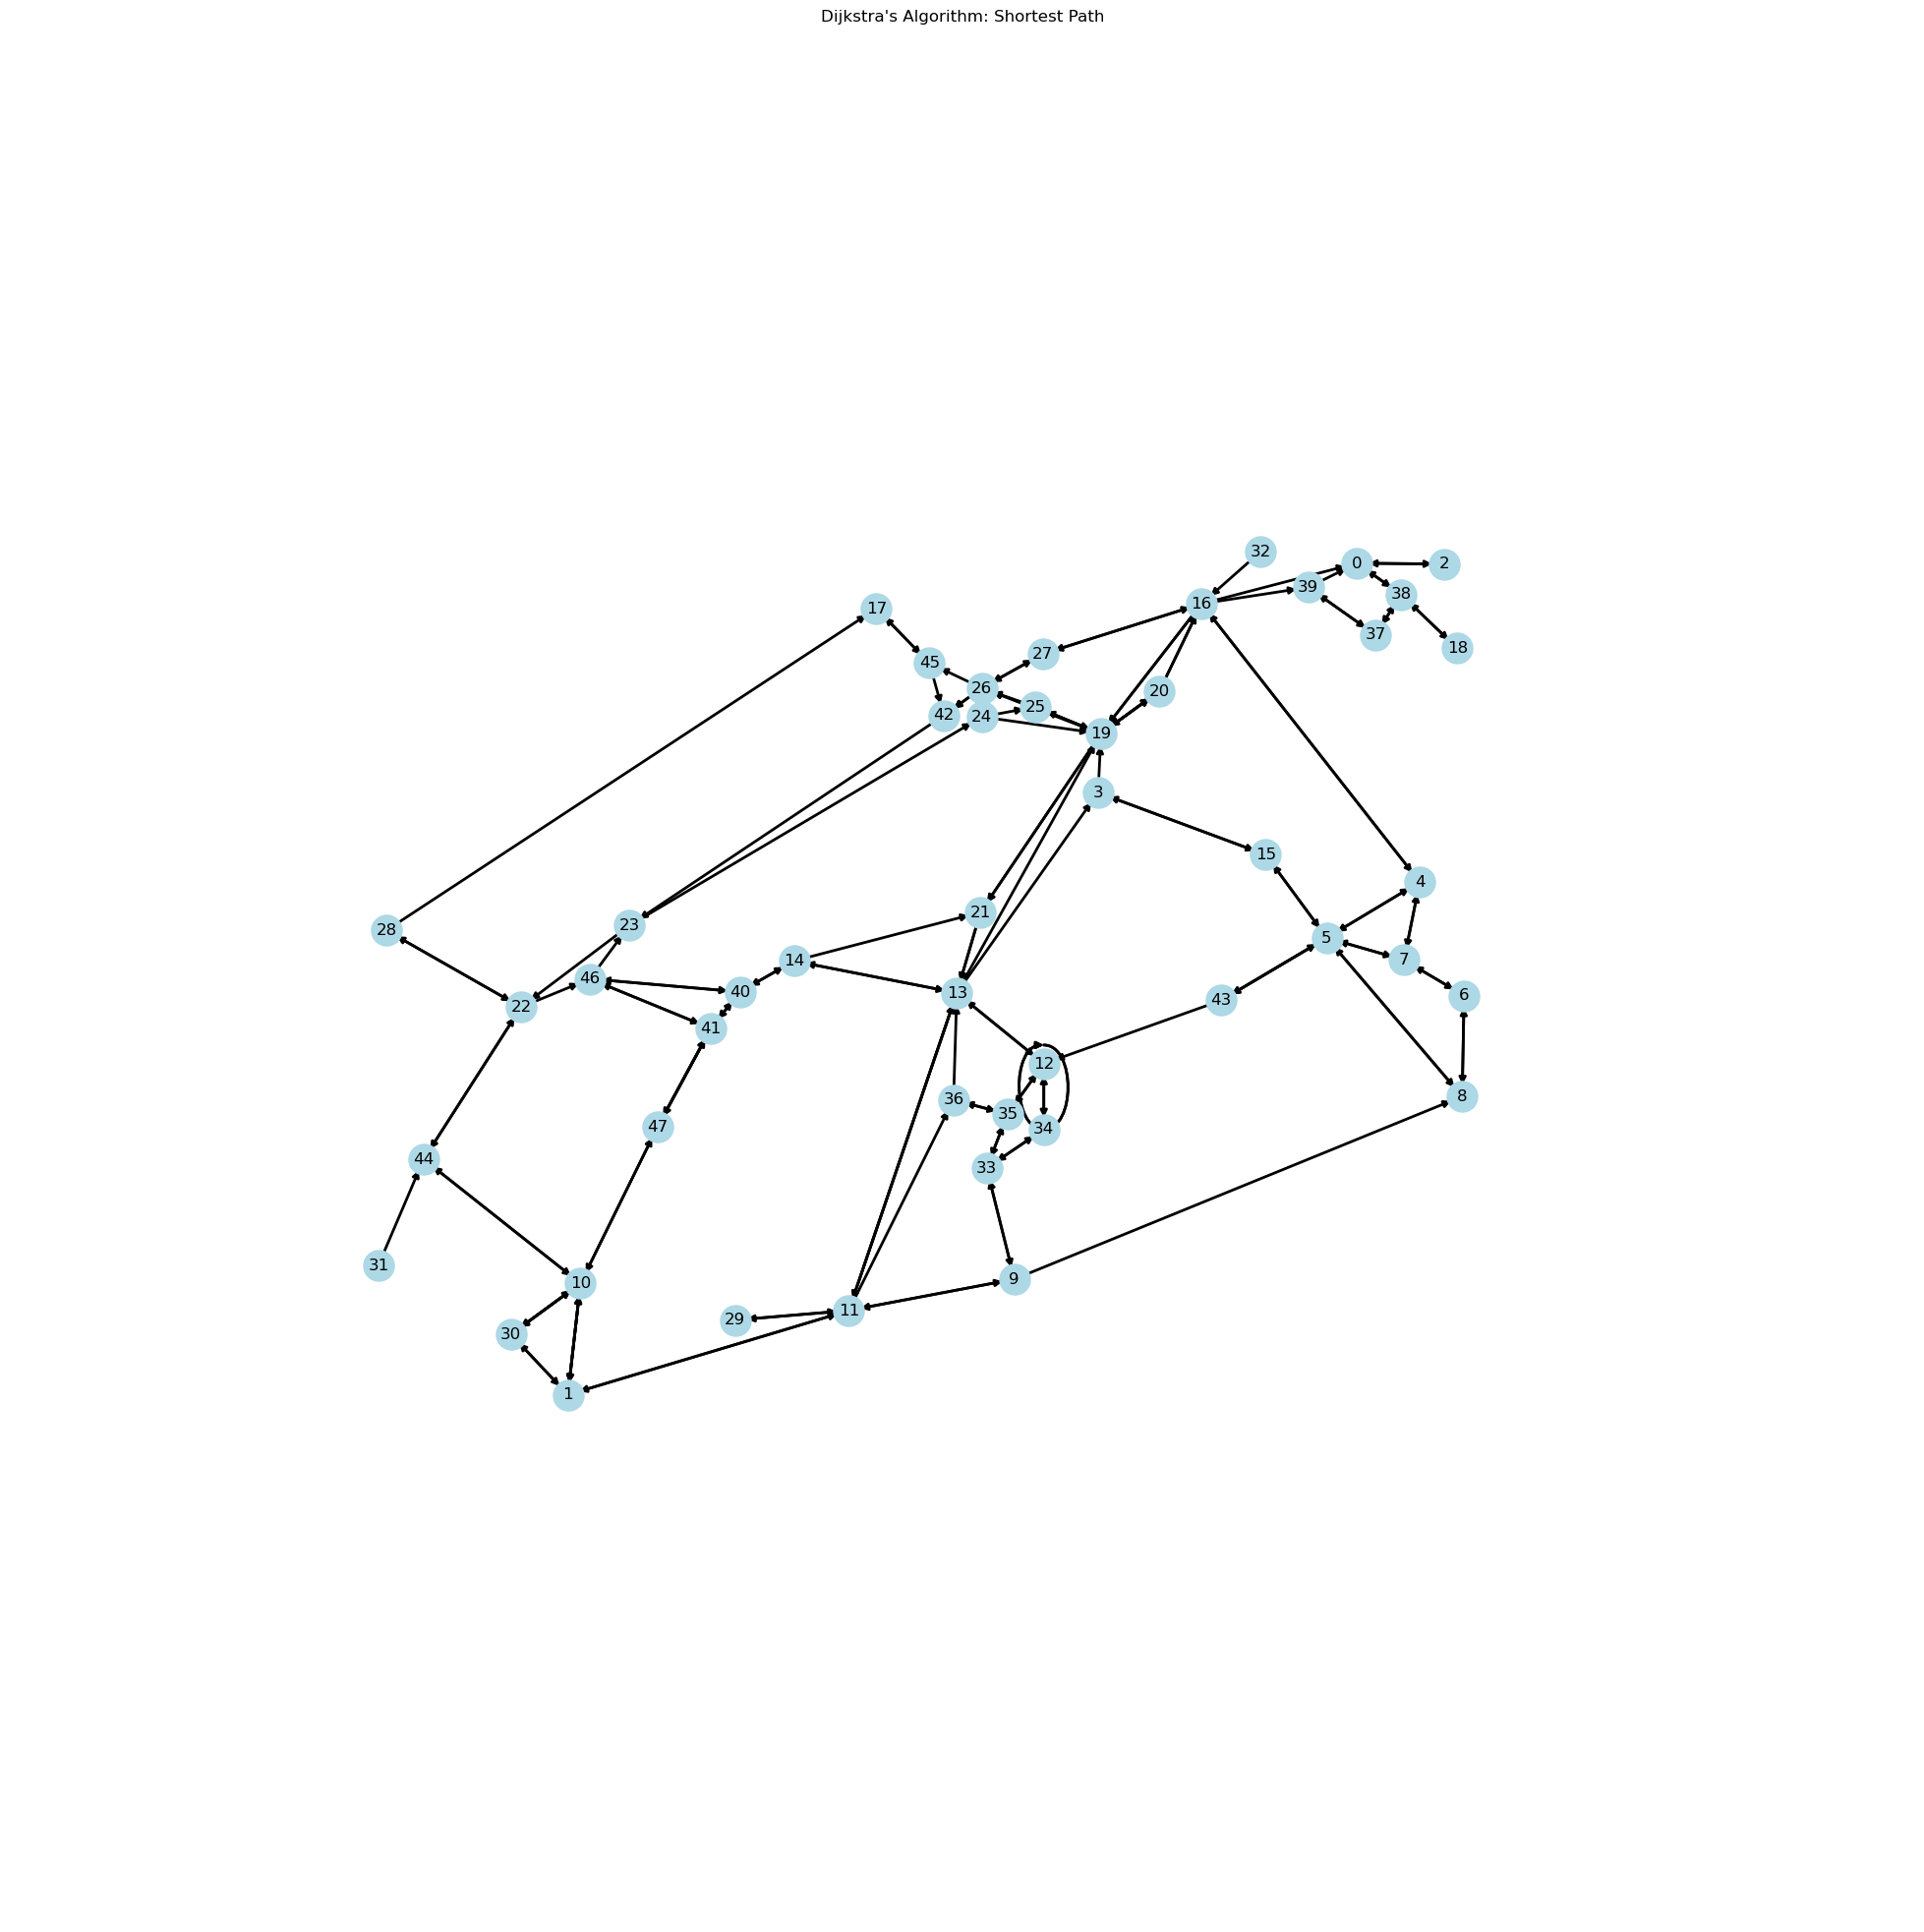

In [6]:
################ Dijkstra ############### 

#Dijkstra algorithm
Dijkstra = nx.all_pairs_dijkstra_path_length(G, cutoff=None, weight='weight')
list(Dijkstra)

#Defining distances
length = nx.dijkstra_path_length(G, source=11, target=16)
length_2 = nx.dijkstra_path_length(G, source=16, target=11)
length_3 = nx.dijkstra_path_length(G, source=12, target=14)
length_4 = nx.dijkstra_path_length(G, source=14, target=12)
length_5 = nx.dijkstra_path_length(G, source=12, target=41)
length_6 = nx.dijkstra_path_length(G, source=41, target=12)
print("Shortest Path Length from 11 to 16:", length)
print("Shortest Path Length:from 16 to 11:", length_2)
print("Shortest Path Length:from 12 to 14:", length_3)
print("Shortest Path Length:from 14 to 12:", length_4)
print("Shortest Path Length:from 12 to 41:", length_5)
print("Shortest Path Length:from 41 to 12:", length_6)

pos=node_positions

# Draw the base graph
plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title("Dijkstra's Algorithm: Shortest Path")
plt.axis('off')
plt.show()



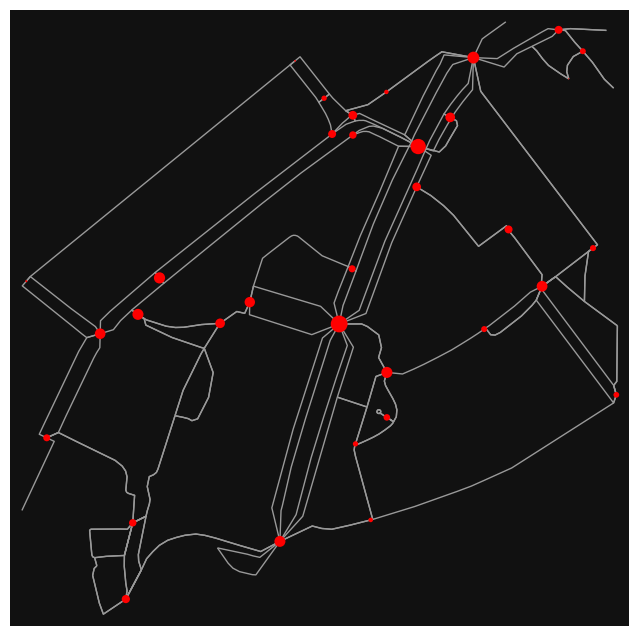

Number of nodes: 48
Number of edges: 135
    Betweenness Centrality
13                0.367715
19                0.304348
16                0.181776
23                0.163275
12                0.159112
46                0.158649
11                0.156337
5                 0.150324
22                0.146161
14                0.140611
20                0.121184
40                0.120259
26                0.099445
3                 0.098057
1                 0.087419
0                 0.082794
42                0.082331
15                0.082331
24                0.071693
10                0.071693
21                0.066142
44                0.063367
34                0.055967
4                 0.048104
43                0.047179
38                0.045791
8                 0.043016
45                0.037465
33                0.036540
9                 0.026827
27                0.025439
28                0.005550
17                0.003700
37                0.001850
41            

In [7]:
############### Betweenness centrality ##################

# Calculating betweenness centrality for each node
bc = nx.betweenness_centrality(G, weight='length')

# Determining node size for betweenness centrality
node_sizes = [bc[node] * 400 for node in G.nodes()]

# Plotting the graph
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Show information about the network
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Create a DataFrame of the betweenness centrality
bc_df = pd.DataFrame.from_dict(bc, orient='index', columns=['Betweenness Centrality'])

#Sort the table with highest values first
bc_df = bc_df.sort_values(by='Betweenness Centrality', ascending=False)

# Print the table
print(bc_df)


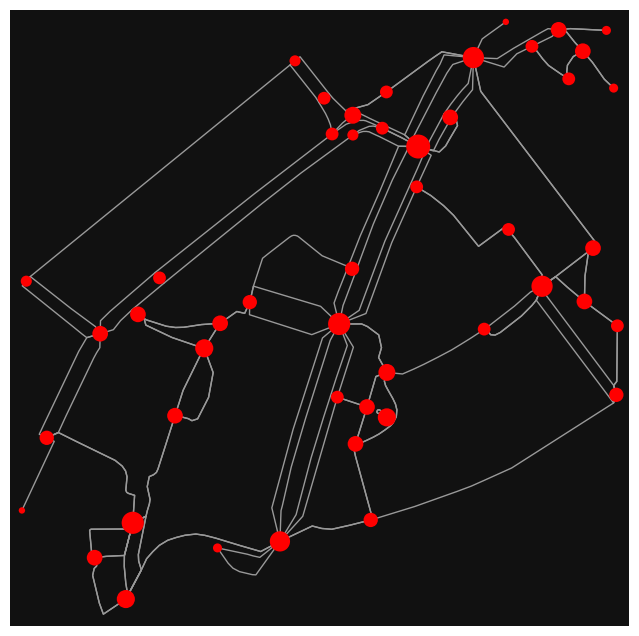

Aantal knooppunten: 48
Aantal edges: 135
First 10 Nodes by degree centrality: [(19, 0.2978723404255319), (10, 0.2553191489361702), (13, 0.2553191489361702), (5, 0.23404255319148937), (16, 0.23404255319148937), (11, 0.2127659574468085), (1, 0.1702127659574468), (34, 0.1702127659574468), (41, 0.1702127659574468), (12, 0.14893617021276595)]
      Node ID  Degree Centrality
Rank                            
1          19           0.297872
2          10           0.255319
3          13           0.255319
4           5           0.234043
5          16           0.234043
6          11           0.212766
7           1           0.170213
8          34           0.170213
9          41           0.170213
10         12           0.148936


In [21]:
################ Degree Centrality ####################

# Calculate degree centrality 
dc = nx.degree_centrality(G)

# Determine node size for degree centrality 
node_sizes = [dc[node] * 1000 for node in G.nodes()]

# Plot the graph 
ox.plot_graph(G, node_size=node_sizes, node_color='red')

# Show information about the network
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

# Sort top 10 #Code van anderen gebruikt. 
first_degree = sorted(dc.items(), key=lambda x: x[1], reverse=True)[:10]
print("First 10 Nodes by degree centrality:", first_degree)

# Place first nodes in DataFrame
df = pd.DataFrame(first_degree, columns=["Node ID", "Degree Centrality"])

# Add ranking
df.index += 1  # Start index at 1
df.index.name = "Rank"

# Print table
print(df)

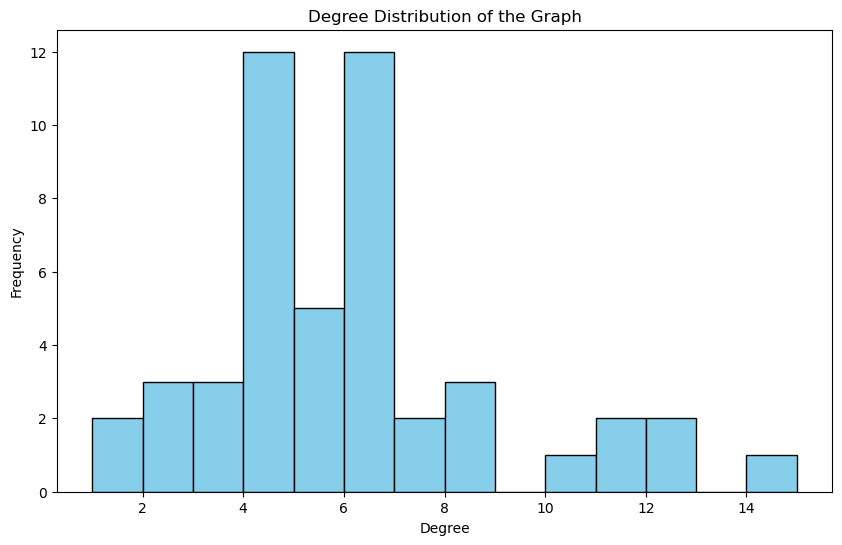

Min degree: 1
Max degree: 14
Nodes with degree 14: [19]


In [23]:
############### Degree Distribution Displayed in Graph ################

degrees = [deg for node, deg in G.degree()]

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) +2), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Graph')
plt.show()

print("Min degree:", min(degrees))
print("Max degree:", max(degrees))

# Code to identify nodes with a certain degree
target_degree = 14

# Define nodes with the target degree
nodes_with_target_degree = [node for node, deg in G.degree() if deg == target_degree]

# Print 
print(f"Nodes with degree {target_degree}: {nodes_with_target_degree}")

C:\Users\koste\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-means Clustering (3 Clusters)\nTotal Distance to Centroids: 0.00')

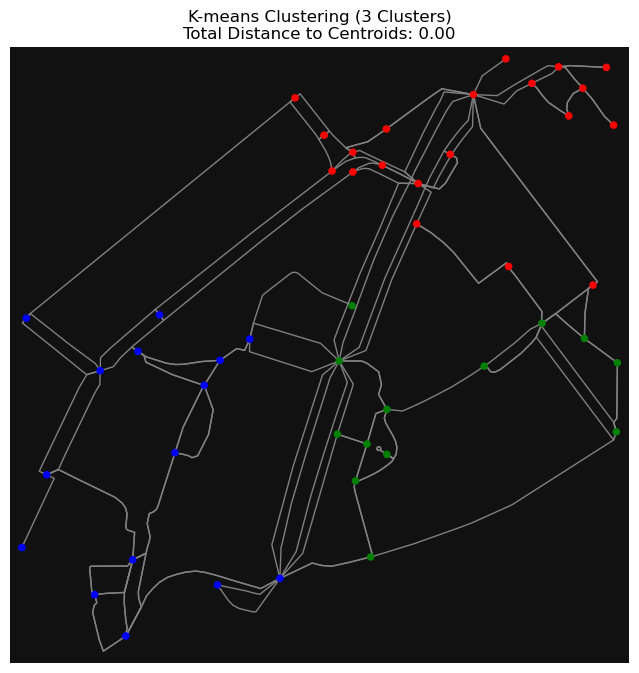

In [25]:
### K-means ###

# Extract node positions from the graph
node_ids = list(G.nodes())
node_coords = np.array([(G.nodes[n]['x'], G.nodes[n]['y']) for n in node_ids])

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(node_coords)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_  # total distance to centroids

# Assign colors based on cluster label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
node_colors = [colors[label] for label in labels]

# Map nodes to cluster labels
node_cluster_labels = {node_ids[i]: labels[i] for i in range(len(node_ids))}

# Plot the clustered graph
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=30,
    edge_color='gray',
    show=False,
    close=False
)

# Plot centroids
for c in centroids:
    ax.plot(c[0], c[1])

plt.title(f"K-means Clustering (3 Clusters)\nTotal Distance to Centroids: {inertia:.2f}")

In [27]:
#################################################
#################################################
############ Disruption Scenario ################
#################################################
#################################################

C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


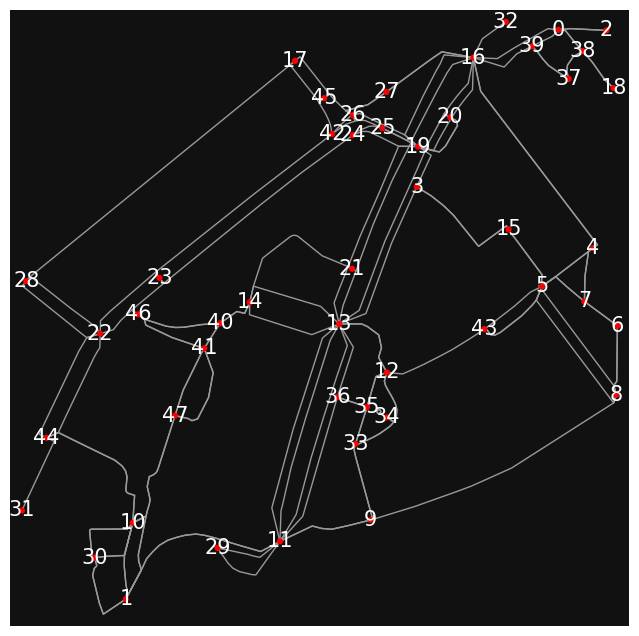

Number of nodes: 48
Number of edges: 135


In [29]:
############### Disruption Scenario map ######################

# Load and simplify the graph
H = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands", dist=300)
H = ox.simplification.consolidate_intersections(
    H,
    tolerance=0.00013,  # Try 30-50 meters to cover roundabout radius
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Plot the graph and determine node size and color
fig, ax = ox.plot_graph(H, node_size=20, node_color='red', show=False, close=False)

# Extract node positions from the graph (using 'x' and 'y' attributes)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Draw node labels (node identifiers)
nx.draw_networkx_labels(H, pos=node_positions, ax=ax, font_size=15, font_color='White')

# Show the plot with labels
plt.show()

# Print node and edge counts
num_nodes = H.number_of_nodes()
num_edges = H.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

In [30]:
############### Node Removal ################

#Node identification
node_id=13
node_id2=19

#Node removal 
if node_id in H.nodes:
    H.remove_node(node_id)
    H.remove_node(node_id2)
    #G.remove_node(node_positions)
    print(f"Node {node_id} removed successfully.")
    print(f"Node {node_id2} removed successfully.")
else:
    print("Node not found.")

num_nodes = len(H.nodes)

print("Number of nodes:", num_nodes)


Node 13 removed successfully.
Node 19 removed successfully.
Number of nodes: 46


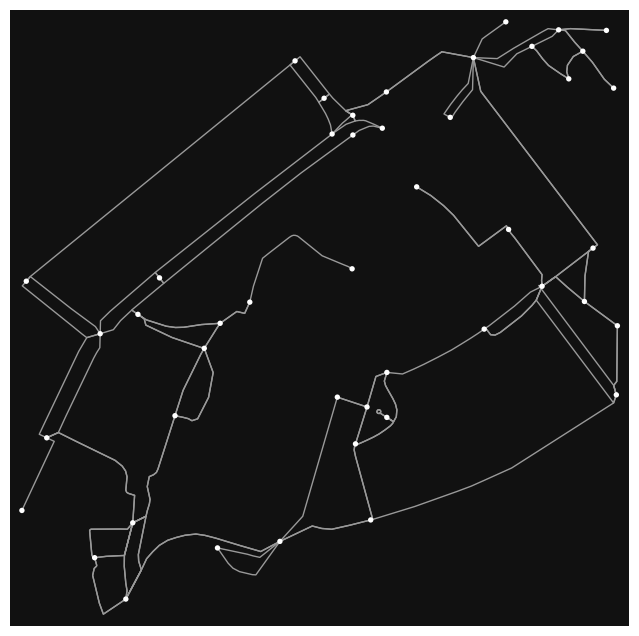

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [33]:
ox.plot_graph(H)

In [35]:
############### Average shortest path length #####################

#Create undirected graph
H_u = H.to_undirected()

# Determine average path length
avg_path_length = nx.average_shortest_path_length(H_u)
print("Average shortest path length (largest connected component):", avg_path_length)


Average shortest path length (largest connected component): 5.076328502415459


Shortest Path Length from 11 to 16: 5
Shortest Path Length:from 16 to 11: 8
Shortest Path Length:from 12 to 14: 10
Shortest Path Length:from 14 to 12: 9
Shortest Path Length:from 12 to 41: 8
Shortest Path Length:from 41 to 12: 7


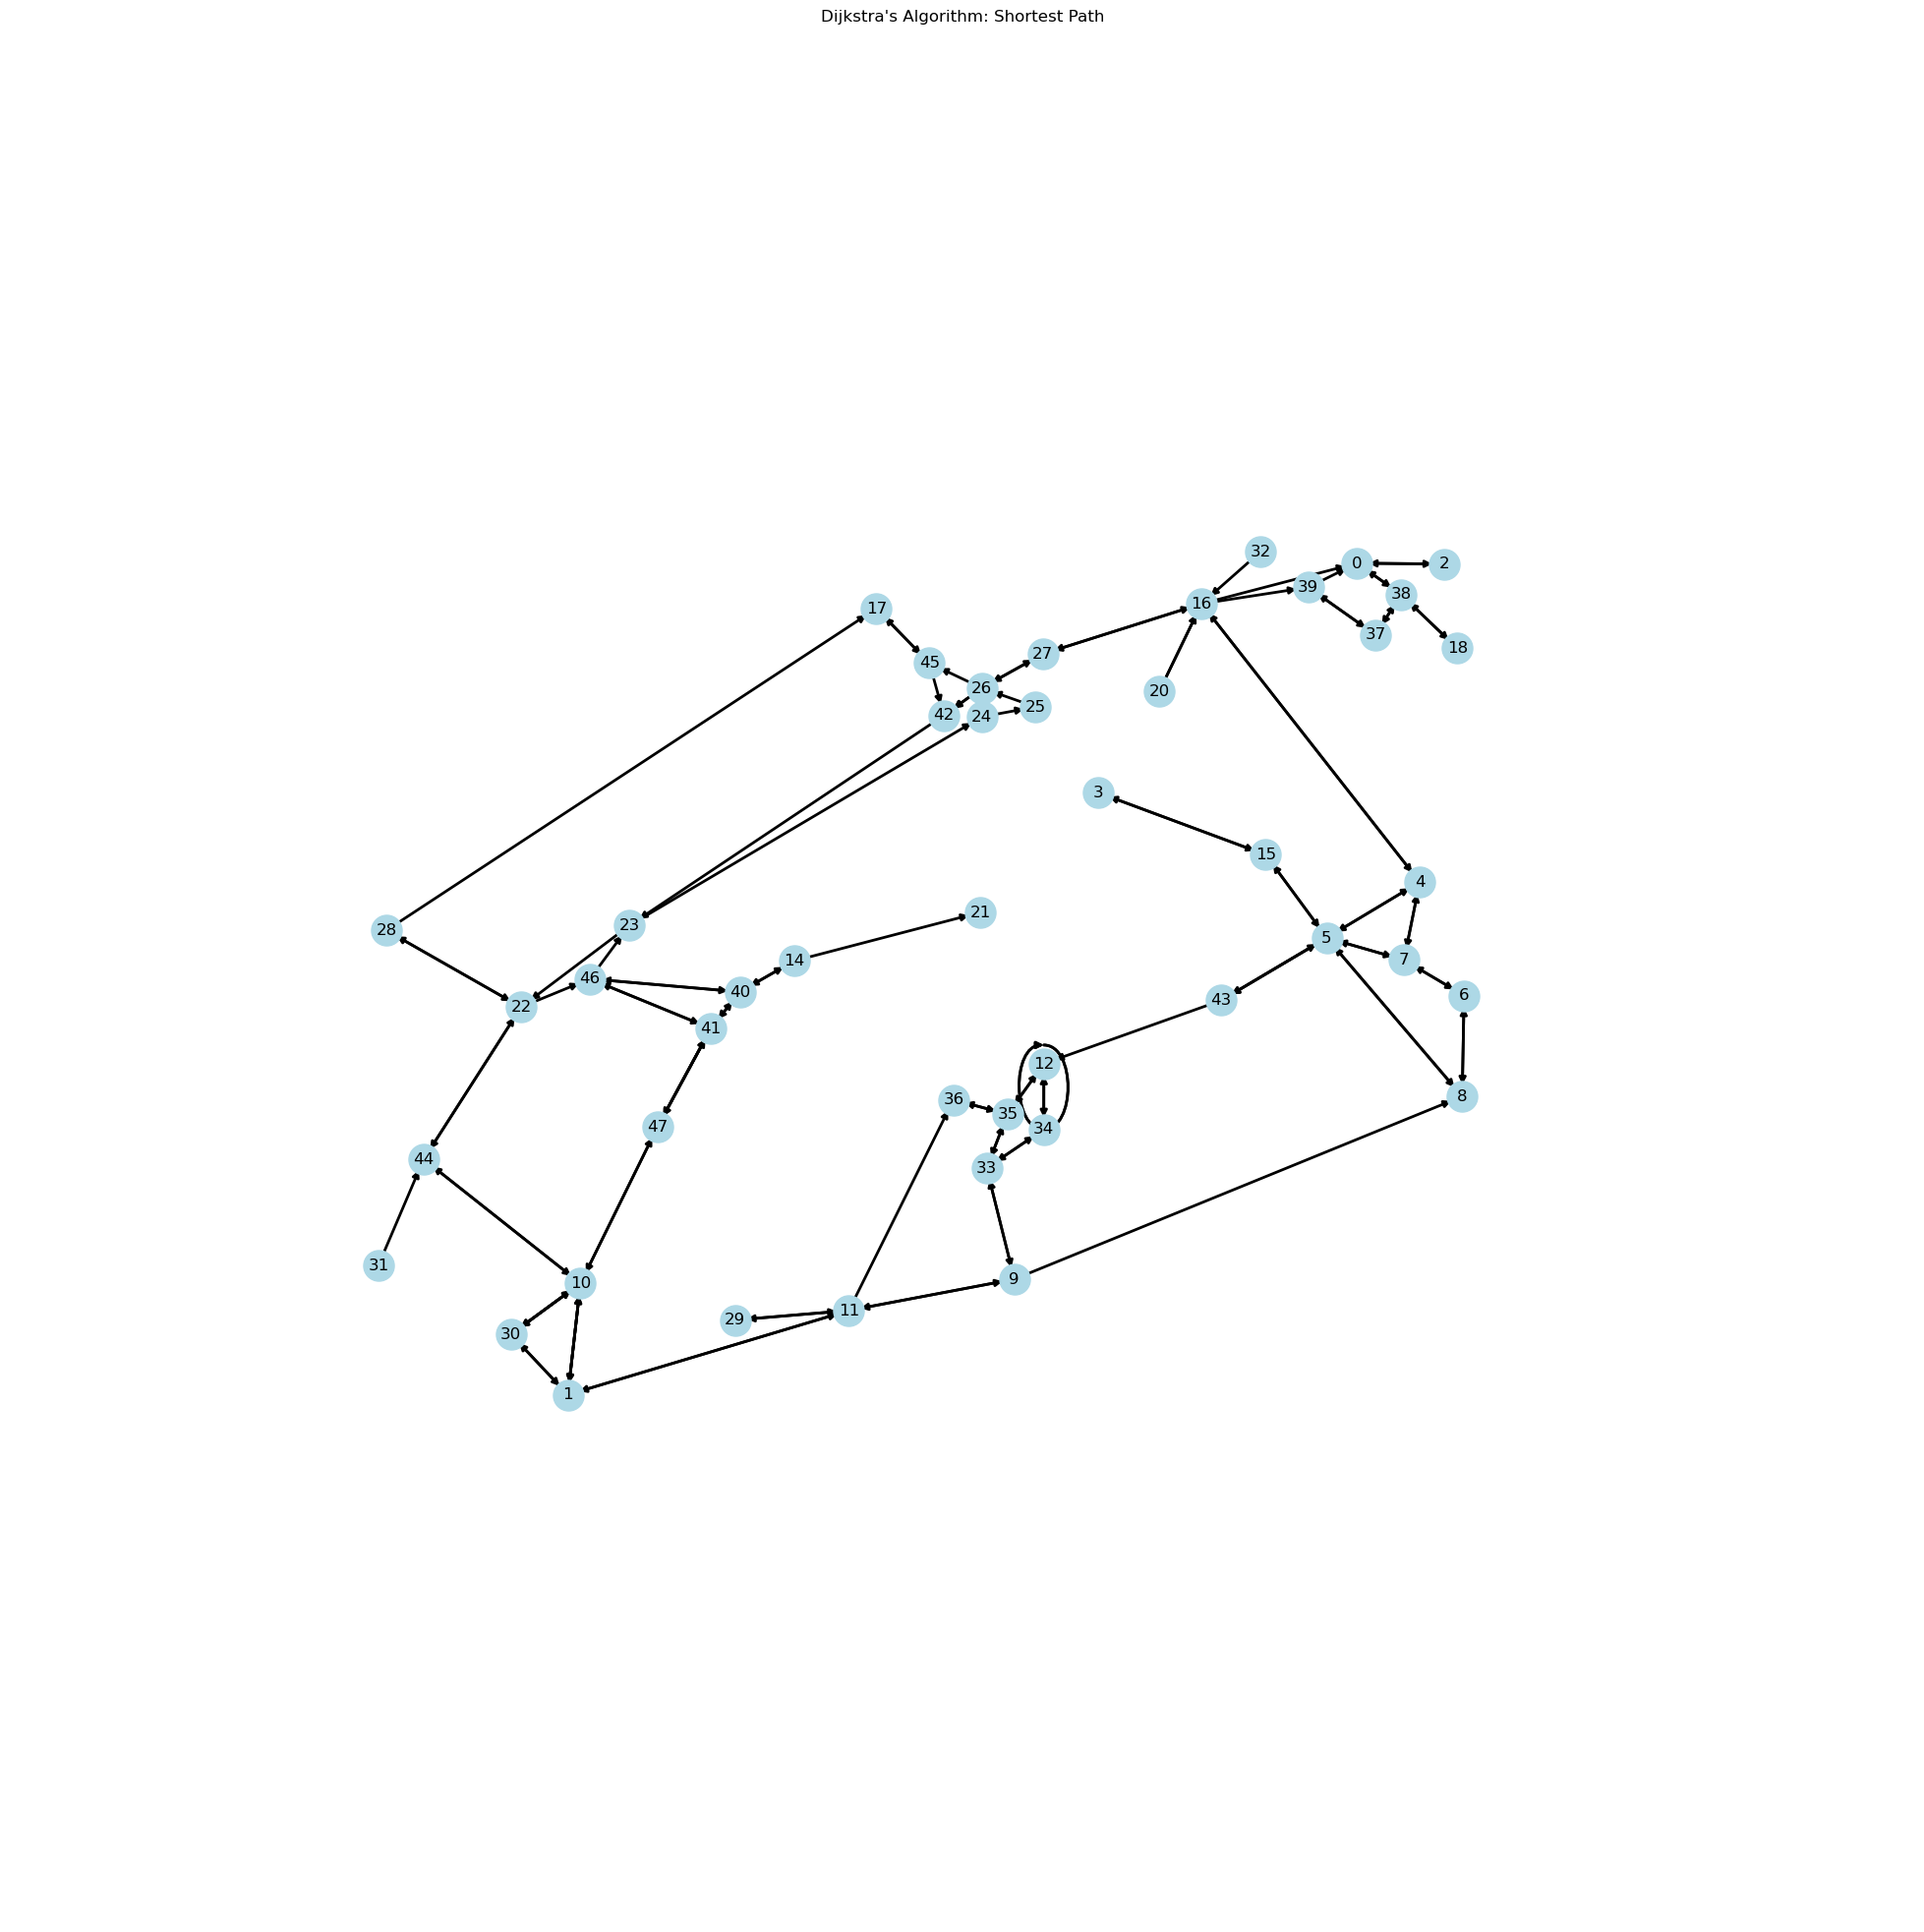

In [37]:
################ Dijkstra ############### 

#Dijkstra algorithm
Dijkstra = nx.all_pairs_dijkstra_path_length(H, cutoff=None, weight='weight')
list(Dijkstra)

#Defining distances
length = nx.dijkstra_path_length(H, source=11, target=16)
length_2 = nx.dijkstra_path_length(H, source=16, target=11)
length_3 = nx.dijkstra_path_length(H, source=12, target=14)
length_4 = nx.dijkstra_path_length(H, source=14, target=12)
length_5 = nx.dijkstra_path_length(H, source=12, target=41)
length_6 = nx.dijkstra_path_length(H, source=41, target=12)
print("Shortest Path Length from 11 to 16:", length)
print("Shortest Path Length:from 16 to 11:", length_2)
print("Shortest Path Length:from 12 to 14:", length_3)
print("Shortest Path Length:from 14 to 12:", length_4)
print("Shortest Path Length:from 12 to 41:", length_5)
print("Shortest Path Length:from 41 to 12:", length_6)

pos=node_positions

# Draw the base graph
plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(H, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(H, pos, width=2)
nx.draw_networkx_labels(H, pos, font_size=12, font_color='black')

# Plot graph
plt.title("Dijkstra's Algorithm: Shortest Path")
plt.axis('off')
plt.show()

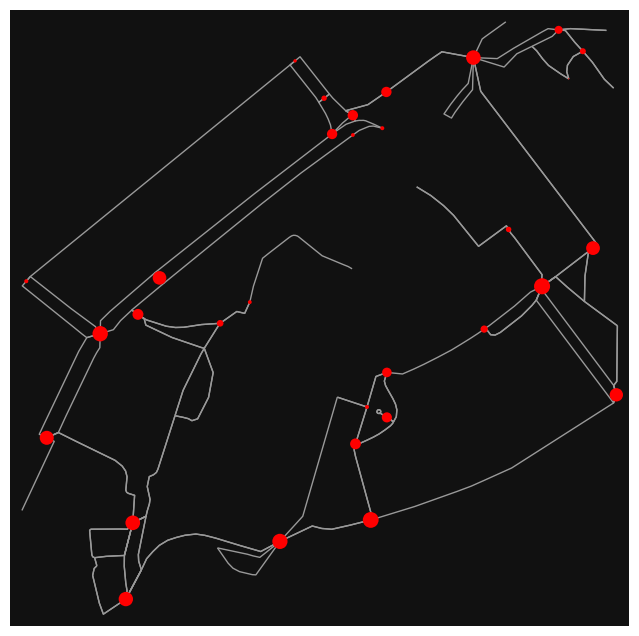

Aantal knooppunten: 46
Aantal edges: 110
    Betweenness Centrality
5                 0.333333
9                 0.324747
22                0.306566
11                0.300000
10                0.278283
16                0.275253
1                 0.267677
44                0.255051
4                 0.245960
23                0.240909
8                 0.231313
46                0.155051
33                0.152020
26                0.140909
27                0.138889
42                0.137879
34                0.132828
12                0.119192
0                 0.084343
43                0.068687
40                0.057576
38                0.046970
15                0.039394
45                0.037879
28                0.021212
35                0.020707
25                0.020707
14                0.019192
24                0.018687
17                0.014646
37                0.002020
29                0.000000
2                 0.000000
3                 0.000000
6             

In [38]:
############### Betweenness centrality ##################

# Calculating betweenness centrality for each node
bc = nx.betweenness_centrality(H, weight='length')

# Determine nodes size by betweenness centrality.
node_sizes = [bc[node] * 400 for node in H.nodes()]

# Plot de graph met node sizes gebaseerd op betweenness centrality
ox.plot_graph(H, node_size=node_sizes, node_color='red')

# Show information about network
num_nodes = H.number_of_nodes()
num_edges = H.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

# Create a DataFrame of the betweenness centrality
bc_df = pd.DataFrame.from_dict(bc, orient='index', columns=['Betweenness Centrality'])

# Sort the table with highest values first
bc_df = bc_df.sort_values(by='Betweenness Centrality', ascending=False)

# Print the table
print(bc_df)

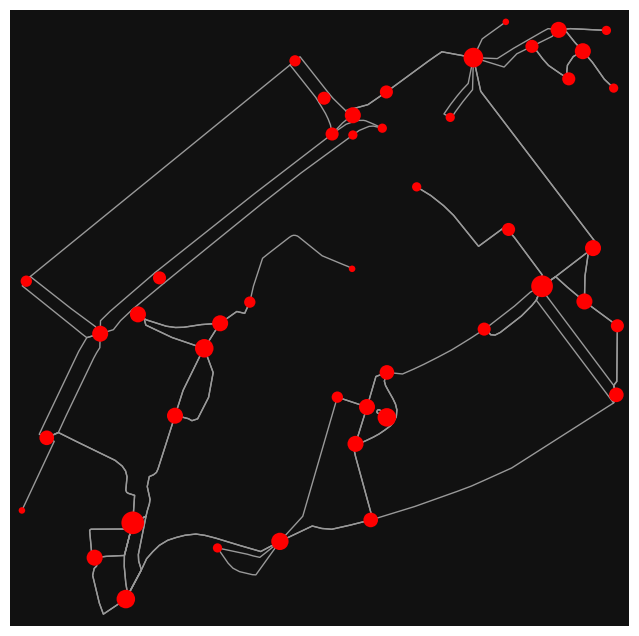

Aantal knooppunten: 46
Aantal edges: 110
Top 10 Nodes by degree centrality: [(10, 0.26666666666666666), (5, 0.24444444444444446), (16, 0.2), (1, 0.17777777777777778), (34, 0.17777777777777778), (41, 0.17777777777777778), (11, 0.15555555555555556), (0, 0.13333333333333333), (4, 0.13333333333333333), (7, 0.13333333333333333)]
      Node ID  Degree Centrality
Rank                            
1          19           0.297872
2          10           0.255319
3          13           0.255319
4           5           0.234043
5          16           0.234043
6          11           0.212766
7           1           0.170213
8          34           0.170213
9          41           0.170213
10         12           0.148936


In [41]:
################ Degree Centrality ####################
# Lecture 2a 

# Calculating degree centrality 
dc_H = nx.degree_centrality(H)

# Determining nodes size for degree centrality
node_sizes = [dc_H[node] * 1000 for node in H.nodes()]

# Plot de graph with node sizes based degree centrality
ox.plot_graph(H, node_size=node_sizes, node_color='red')

# Show information about the network
num_nodes = H.number_of_nodes()
num_edges = H.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

# Sort the table, showing the first 10 nodes 
top_degree = sorted(dc_H.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by degree centrality:", top_degree)

# Convert the top 10 nodes to DataFrame
df_H = pd.DataFrame(top_degree, columns=["Node ID", "Degree Centrality"])

# Add ranking
df_H.index += 1  # Start index at 1
df_H.index.name = "Rank"

# Display table
print(df)

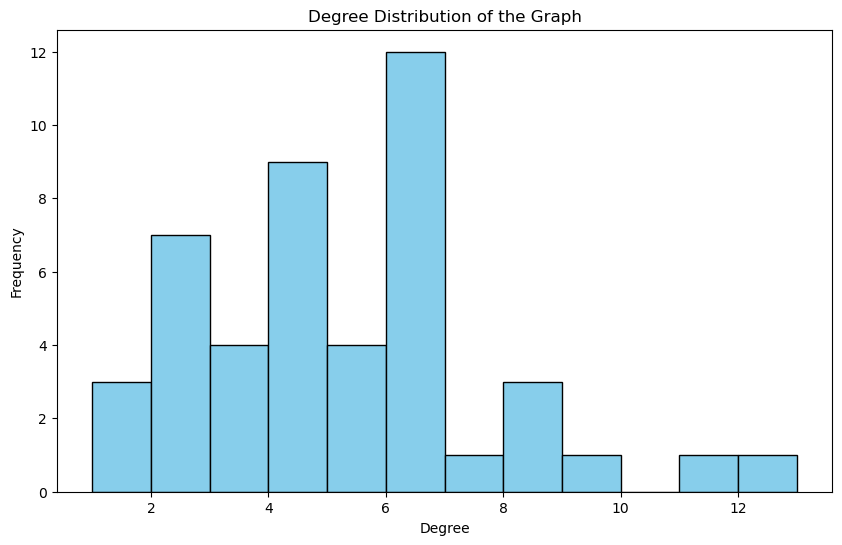

Nodes with degree 14: []


In [43]:
############### Degree Distribution Displayed in Graph ################

#Calculate the degree of distribution for each node 
degrees_H = [deg for node, deg in H.degree()]

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees_H, bins=range(min(degrees_H), max(degrees_H) +2), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Graph')
plt.show()

# Code to identify nodes with a certain degree
target_degree = 14

# Define nodes with the target tegree
nodes_with_target_degree = [node for node, deg in H.degree() if deg == target_degree]

print(f"Nodes with degree {target_degree}: {nodes_with_target_degree}")

C:\Users\koste\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-means Clustering (3 Clusters)\nTotal Distance to Centroids: 0.00')

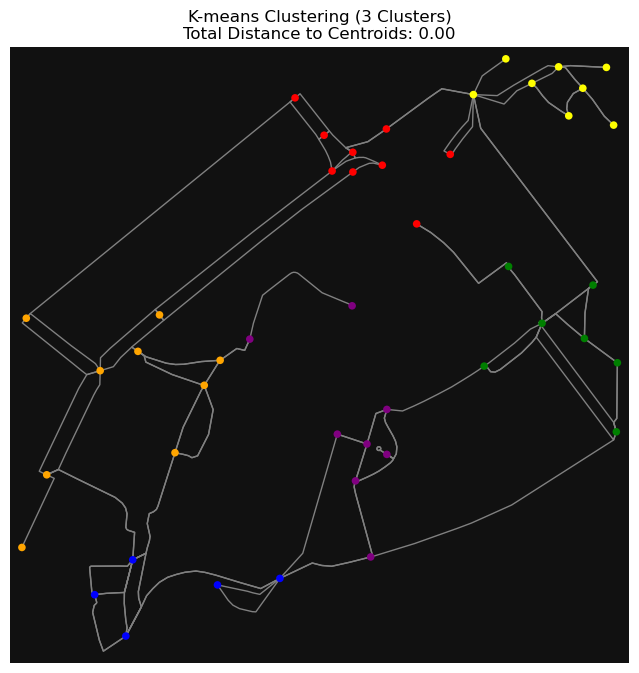

In [45]:
### K-means ####

# Extract node positions from the graph
node_ids = list(H.nodes())
node_coords = np.array([(H.nodes[n]['x'], H.nodes[n]['y']) for n in node_ids])

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=6, random_state=0).fit(node_coords)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_  # total distance to centroids

# Assign colors based on cluster label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
node_colors = [colors[label] for label in labels]

# Map nodes to cluster labels
node_cluster_labels = {node_ids[i]: labels[i] for i in range(len(node_ids))}

# Plot the clustered graph
fig, ax = ox.plot_graph(
    H,
    node_color=node_colors,
    node_size=30,
    edge_color='gray',
    show=False,
    close=False
)

# Plot centroids
for c in centroids:
    ax.plot(c[0], c[1])

plt.title(f"K-means Clustering (3 Clusters)\nTotal Distance to Centroids: {inertia:.2f}")

In [47]:

#################################################
#################################################
########## Analysis Solution Scenario ###########
#################################################
#################################################


C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:585: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
C:\Users\koste\anaconda3\Lib\site-packages\osmnx\simplification.py:640: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


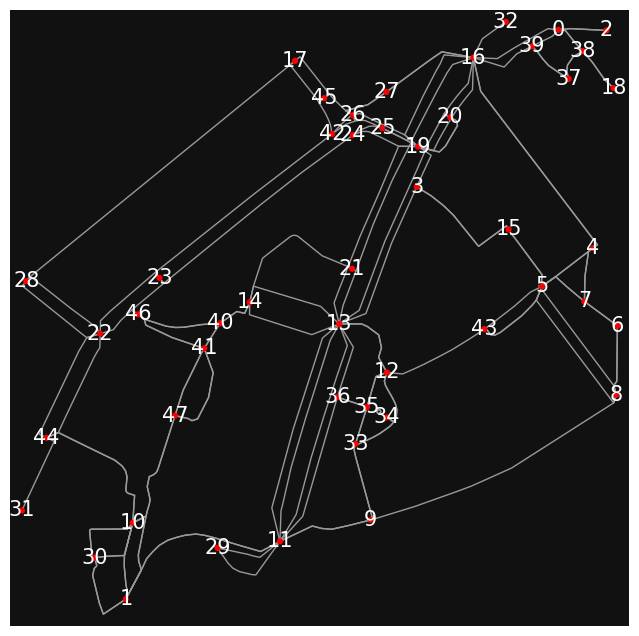

Number of nodes: 48
Number of edges: 135


In [49]:
####Plotting our graph with node identification

# Load and simplify the graph
S = ox.graph_from_address(address="Churchillplein, Den Haag, Netherlands", dist=300)
S = ox.simplification.consolidate_intersections(
    S,
    tolerance=0.00013,  # Try 30-50 meters to cover roundabout radius
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

# Plot the graph and determine node size and color
fig, ax = ox.plot_graph(G, node_size=20, node_color='red', show=False, close=False)

# Extract node positions from the graph (using 'x' and 'y' attributes)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Draw node labels (node identifiers)
nx.draw_networkx_labels(S, pos=node_positions, ax=ax, font_size=15, font_color='White')

# Show the plot with labels
plt.show()

# Print node and edge counts
num_nodes = S.number_of_nodes()
num_edges = S.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Node 13 removed successfully.
Node 19 removed successfully.
Number of nodes: 46


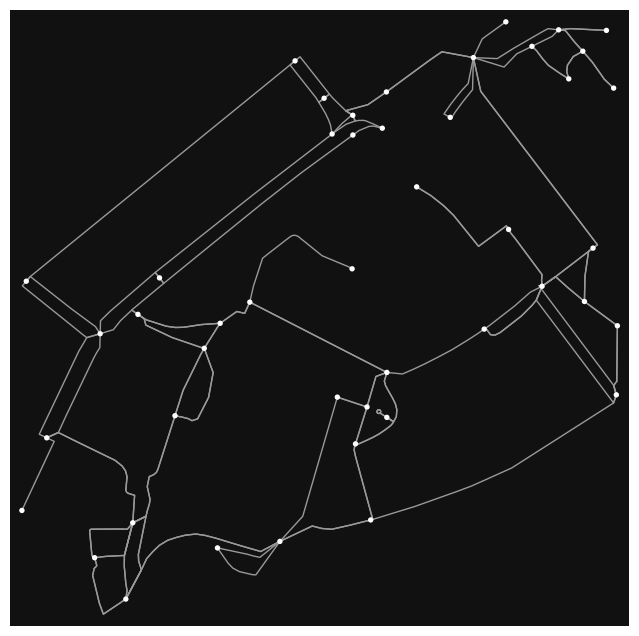

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [50]:
#Add edge between node 12 and 14
S.add_edges_from([(12, 14), (14, 12)])

#Node identificatoin
node_id=13
node_id2=19

#Node removal 
if node_id in S.nodes:
    S.remove_node(node_id)
    S.remove_node(node_id2)
    #G.remove_node(node_positions)
    print(f"Node {node_id} removed successfully.")
    print(f"Node {node_id2} removed successfully.")
else:
    print("Node not found.")

num_nodes = len(S.nodes)

print("Number of nodes:", num_nodes)

ox.plot_graph(S)

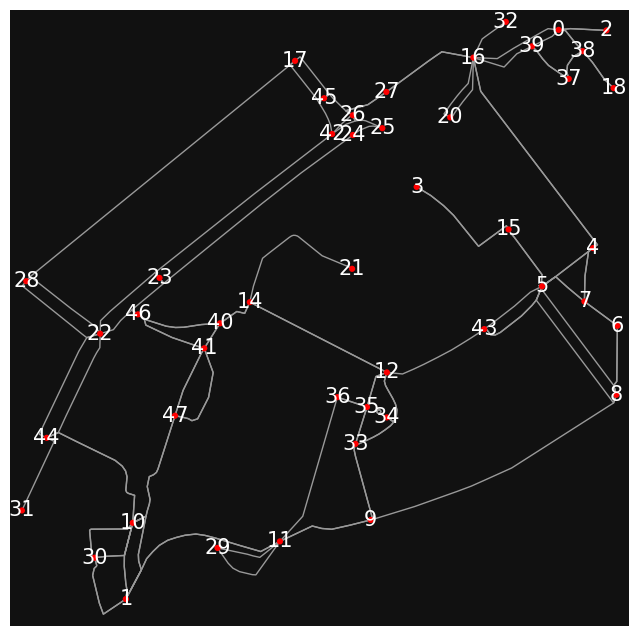

Number of nodes: 46
Number of edges: 112


In [51]:
# Load and simplify the graph

# Plot the graph and capture the figure and axis objects
fig, ax = ox.plot_graph(S, node_size=20, node_color='red', show=False, close=False)

# Extract node positions from the graph (using 'x' and 'y' attributes)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Draw node labels (node identifiers)
nx.draw_networkx_labels(S, pos=node_positions, ax=ax, font_size=15, font_color='White')

# Show the plot with labels
plt.show()

# Optionally, print node and edge counts
num_nodes = S.number_of_nodes()
num_edges = S.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

In [53]:
############### Average shortest path length #####################

# Create undirected graph
S_u = S.to_undirected()
avg_path_length_su = nx.average_shortest_path_length(S_u)
print("Average shortest path length (largest connected component):", avg_path_length_su)


Average shortest path length (largest connected component): 4.72463768115942


Shortest Path Length from 11 to 16: 5
Shortest Path Length:from 16 to 11: 8
Shortest Path Length:from 12 to 14: 1
Shortest Path Length:from 14 to 12: 1
Shortest Path Length:from 12 to 41: 3
Shortest Path Length:from 41 to 12: 3


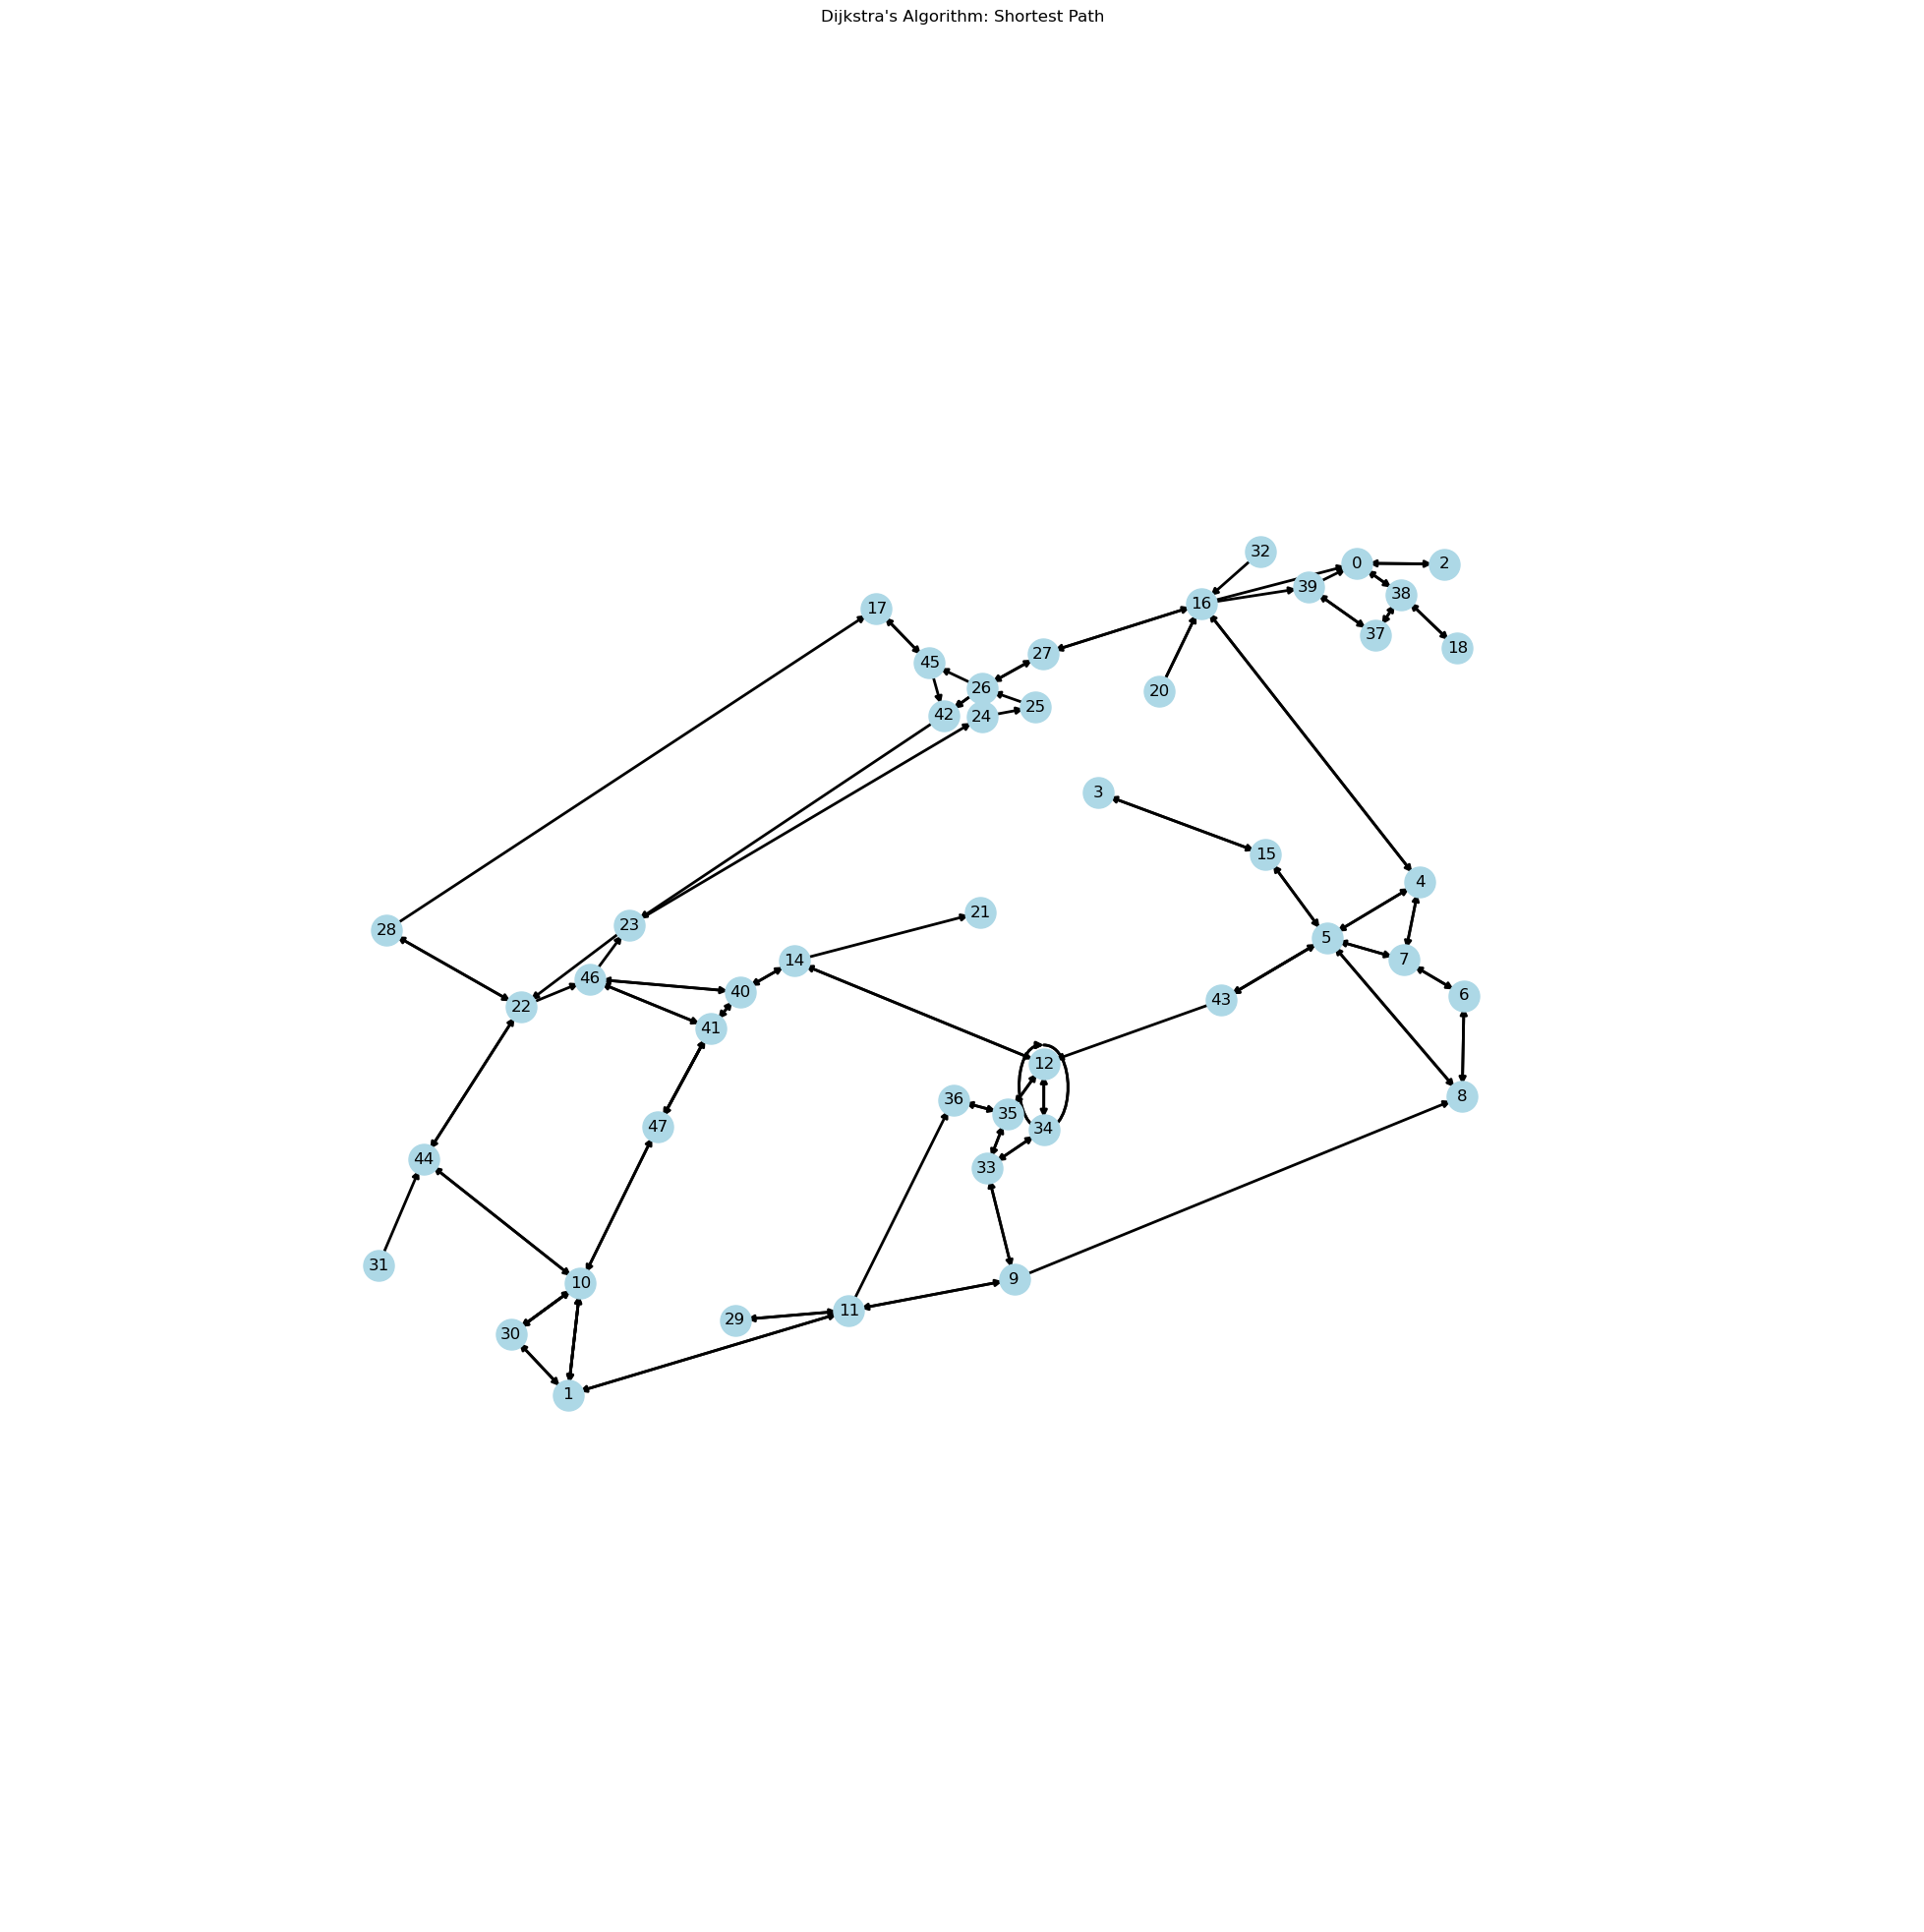

In [55]:
################ Dijkstra ############### 

#Dijkstra algorithm
Dijkstra = nx.all_pairs_dijkstra_path_length(S, cutoff=None, weight='weight')
list(Dijkstra)

# Define distances
length = nx.dijkstra_path_length(S, source=11, target=16) 
length_2 = nx.dijkstra_path_length(S, source=16, target=11)
length_3 = nx.dijkstra_path_length(S, source=12, target=14)
length_4 = nx.dijkstra_path_length(S, source=14, target=12)
length_5 = nx.dijkstra_path_length(S, source=12, target=41)
length_6 = nx.dijkstra_path_length(S, source=41, target=12)
print("Shortest Path Length from 11 to 16:", length)
print("Shortest Path Length:from 16 to 11:", length_2)
print("Shortest Path Length:from 12 to 14:", length_3)
print("Shortest Path Length:from 14 to 12:", length_4)
print("Shortest Path Length:from 12 to 41:", length_5)
print("Shortest Path Length:from 41 to 12:", length_6)

pos=node_positions

# Draw the base graph
plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(S, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(S, pos, width=2)
nx.draw_networkx_labels(S, pos, font_size=12, font_color='black')

plt.title("Dijkstra's Algorithm: Shortest Path")
plt.axis('off')
plt.show()

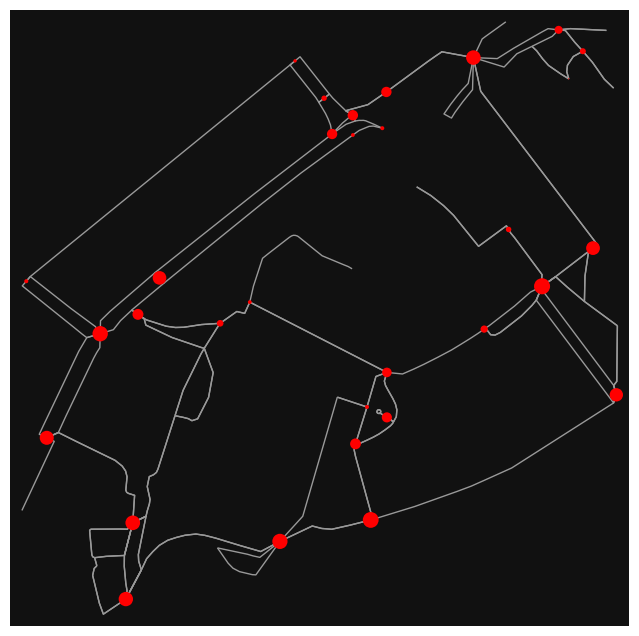

Aantal knooppunten: 46
Aantal edges: 112
    Betweenness Centrality
5                 0.333333
9                 0.324747
22                0.306566
11                0.300000
10                0.278283
16                0.275253
1                 0.267677
44                0.255051
4                 0.245960
23                0.240909
8                 0.231313
46                0.155051
33                0.152020
26                0.140909
27                0.138889
42                0.137879
34                0.132828
12                0.119192
0                 0.084343
43                0.068687
40                0.057576
38                0.046970
15                0.039394
45                0.037879
28                0.021212
35                0.020707
25                0.020707
14                0.019192
24                0.018687
17                0.014646
37                0.002020
29                0.000000
2                 0.000000
3                 0.000000
6             

In [57]:
############### Betweenness centrality ##################

# Calculating betweenness centrality for each node 
bc = nx.betweenness_centrality(S, weight='length')

# Determining node size for betweenness centrality
node_sizes = [bc[node] * 400 for node in S.nodes()]

# Plotting the graph
ox.plot_graph(S, node_size=node_sizes, node_color='red')

# Show information about the network
num_nodes = S.number_of_nodes()
num_edges = S.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

# Create a DataFrame of the betweenness centrality 
bc_df = pd.DataFrame.from_dict(bc, orient='index', columns=['Betweenness Centrality'])

# Sort the table by centrality
bc_df = bc_df.sort_values(by='Betweenness Centrality', ascending=False)

# Display the table
print(bc_df)


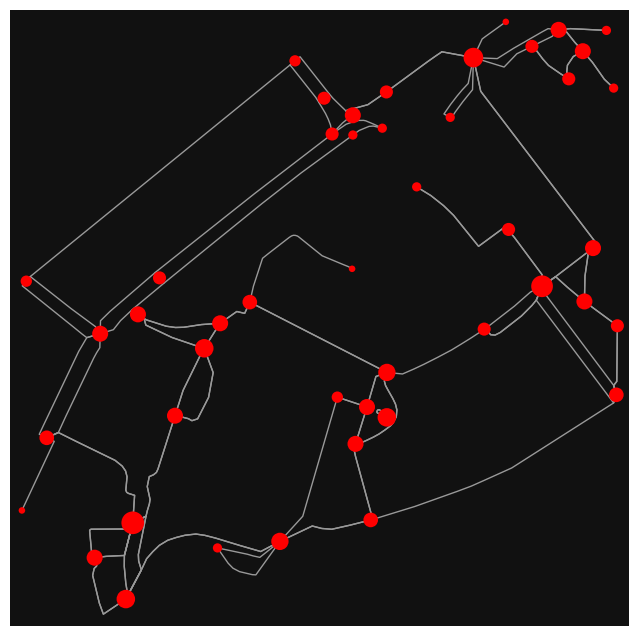

Aantal knooppunten: 46
Aantal edges: 112
Top 10 Nodes by degree centrality: [(10, 0.26666666666666666), (5, 0.24444444444444446), (16, 0.2), (1, 0.17777777777777778), (34, 0.17777777777777778), (41, 0.17777777777777778), (11, 0.15555555555555556), (12, 0.15555555555555556), (0, 0.13333333333333333), (4, 0.13333333333333333)]
      Node ID  Degree Centrality
Rank                            
1          10           0.266667
2           5           0.244444
3          16           0.200000
4           1           0.177778
5          34           0.177778
6          41           0.177778
7          11           0.155556
8          12           0.155556
9           0           0.133333
10          4           0.133333


In [59]:
################ Degree Centrality ####################

# Calculating the degree centrality per node
dc_S = nx.degree_centrality(S)

# Determind node size for degree centrality
node_sizes = [dc_S[node] * 1000 for node in S.nodes()]

# Plotting the graph 
ox.plot_graph(S, node_size=node_sizes, node_color='red')

# Show information about the network
num_nodes = S.number_of_nodes()
num_edges = S.number_of_edges()
print(f"Aantal knooppunten: {num_nodes}")
print(f"Aantal edges: {num_edges}")

# Sort first 10 nodes 
top_degree = sorted(dc_S.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by degree centrality:", top_degree)

# Creat a dataframe of the first 10 nodes
df_S = pd.DataFrame(top_degree, columns=["Node ID", "Degree Centrality"])

# Add ranking
df_S.index += 1  # Start index at 1
df_S.index.name = "Rank"

# Display table
print(df_S)

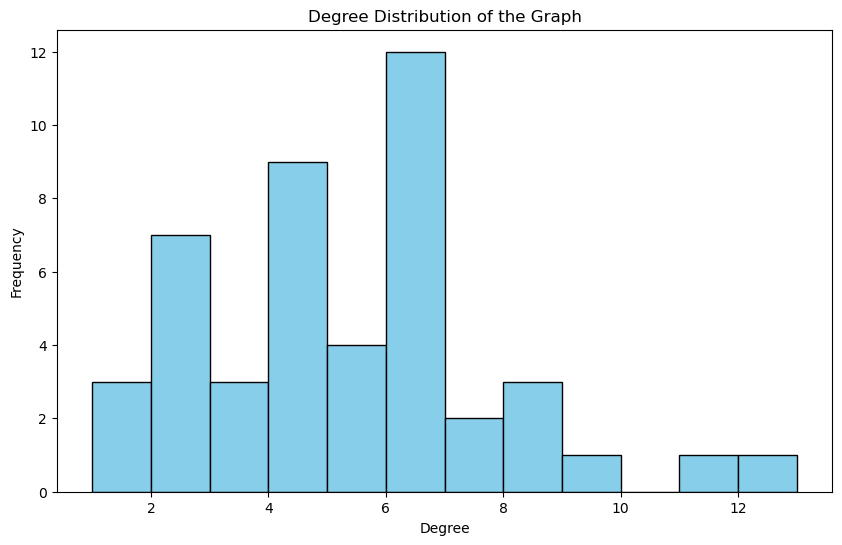

Nodes with degree 14: []


In [61]:
############### Degree Distribution Displayed in Graph ################

# Calculate the degree distrubution for each node
degrees_S = [deg for node, deg in S.degree()]

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees_S, bins=range(min(degrees_S), max(degrees_S) +2), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Graph')
plt.show()


# Code to identify nodes with a certain degree
target_degree = 14

# Define nodes with the target degree
nodes_with_target_degree = [node for node, deg in S.degree() if deg == target_degree]

print(f"Nodes with degree {target_degree}: {nodes_with_target_degree}")

C:\Users\koste\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-means Clustering (3 Clusters)\nTotal Distance to Centroids: 0.00')

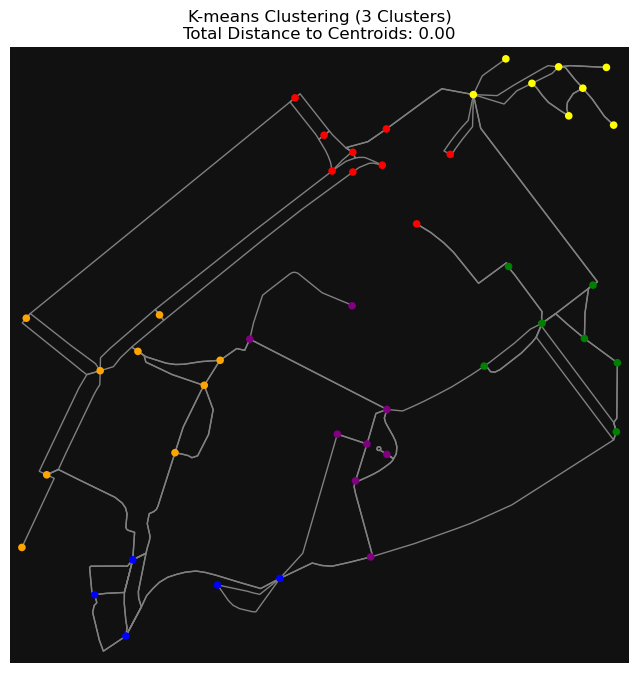

In [63]:
### K-means ###

# Extract node positions from the graph
node_ids = list(S.nodes())
node_coords = np.array([(S.nodes[n]['x'], S.nodes[n]['y']) for n in node_ids])

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=6, random_state=0).fit(node_coords)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_  # total distance to centroids

# Assign colors based on cluster label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
node_colors = [colors[label] for label in labels]

# Map nodes to cluster labels
node_cluster_labels = {node_ids[i]: labels[i] for i in range(len(node_ids))}

# Plot the clustered graph
fig, ax = ox.plot_graph(
    S,
    node_color=node_colors,
    node_size=30,
    edge_color='gray',
    show=False,
    close=False
)

# Plot centroids
for c in centroids:
    ax.plot(c[0], c[1])

plt.title(f"K-means Clustering (3 Clusters)\nTotal Distance to Centroids: {inertia:.2f}")